In [1]:
import HierarchicalSC
import Utils
import pandas as pd
import numpy as np

In [2]:
refDataset = pd.read_csv("./Data/References/HPCA/hpca_data.csv", sep=";", decimal = ",", index_col = 0)
refDataset = refDataset.astype('float')
annot = pd.read_csv("./Data/References//HPCA/hpca_annot.csv",sep=";", index_col = 0)
data = Utils.readSCData("./Data/Datasets/filtered_feature_bc_matrix/", 250)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
Sample_object = HierarchicalSC.HierarchicalSC(data, refDataset, annot)

In [4]:
Sample_object.getCellTypes()

C:\Users\murat_gga8ya6\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\murat_gga8ya6\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\murat_gga8ya6\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\murat_gga8ya6\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\murat_gga8ya6\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [5]:
Sample_object.getMarkerGenes()

C:\Users\murat_gga8ya6\Desktop\Thesis\HierarchicalSC\Utils.py:137: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  markers_lvl = pd.concat([markers_lvl, type1_markers[type1_markers[type1] == 1]],axis =1)
C:\Users\murat_gga8ya6\Desktop\Thesis\HierarchicalSC\Utils.py:137: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  markers_lvl = pd.concat([markers_lvl, type1_markers[type1_markers[type1] == 1]],axis =1)


In [7]:
Sample_object.writeMarkerGenes("./")

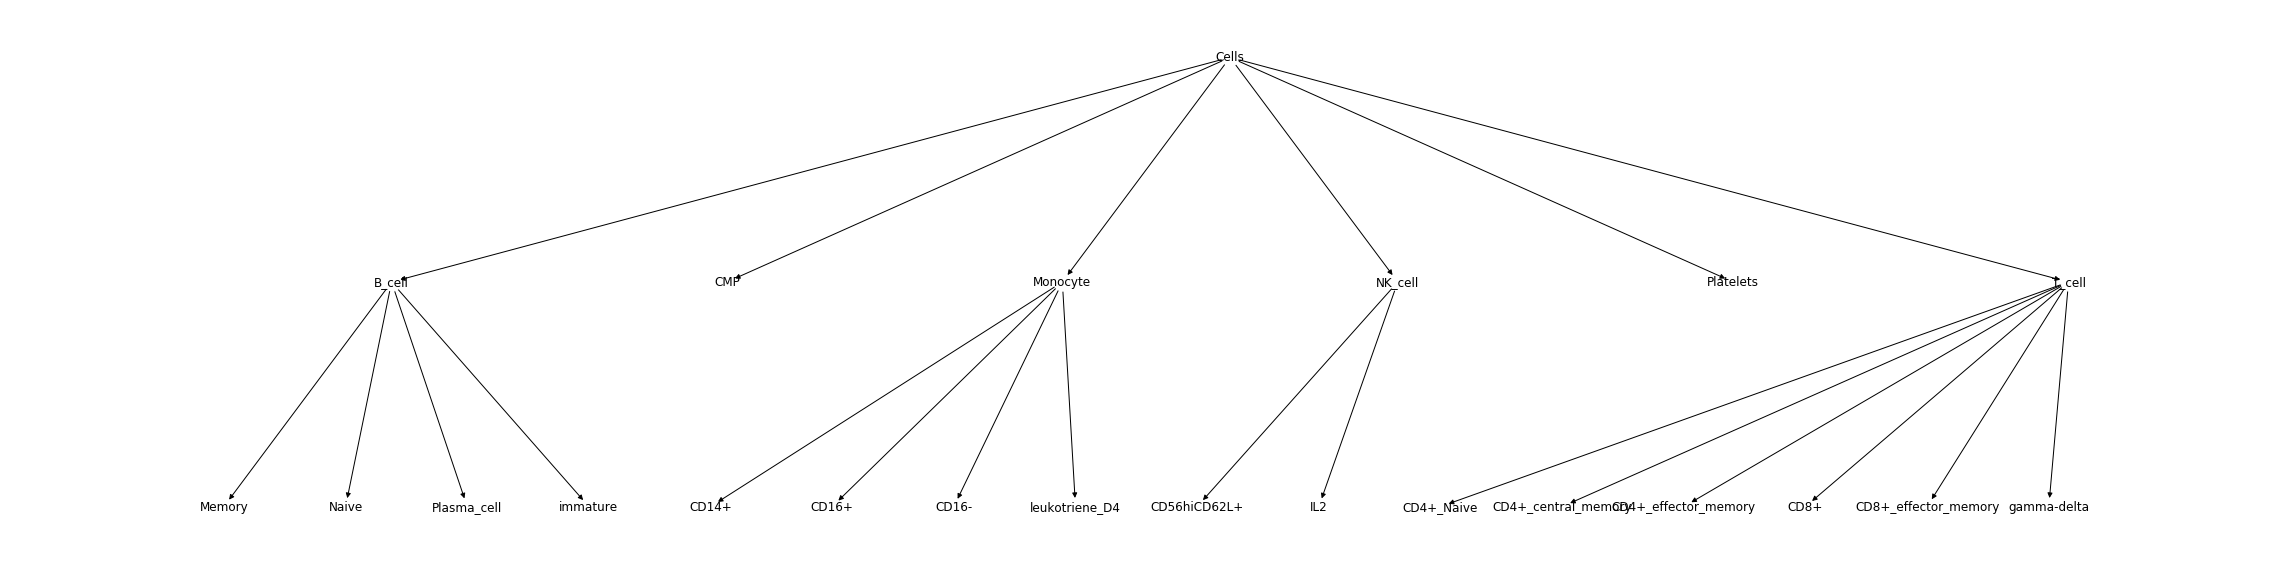

In [8]:
Sample_object.getTreePlot()

In [ ]:
###From here I copied you code but that part is also needed to be revised and added here.

In [9]:
def performSamplePreparation(data, minCounts, maxCounts, minGenes, minCells, maxPercentMito = .1):
    matplotlib.rcParams['figure.figsize'] = [3, 3]
    
    data.var_names_make_unique()
    
    print(data)
    

    
    data.raw = data.copy()
    
    mito_genes = [name for name in data.var_names if name.startswith("MT-")]
    data.obs['percent_mito'] = np.ravel(np.sum(
    data[:, mito_genes].X, axis=1)) / np.ravel(np.sum(data.X, axis=1))
    data.obs['n_counts'] = np.ravel(np.sum(data.X, axis=1))
    
    sc.pp.filter_cells(data, min_genes=0) # Hack to generate the n_genes column
    sc.pp.filter_genes(data, min_cells=0)
    
    priorFilteringCellCount = data.n_obs
    priorFilteringGeneCount = len(data.var[data.var["n_cells"] > 0])
    
    
    sc.pl.violin(data, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)
    
    sc.pp.filter_cells(data, min_genes=minGenes)
    sc.pp.filter_genes(data, min_cells=minCells) 
    
    sc.pl.scatter(data, x='n_counts', y='percent_mito')
    sc.pl.scatter(data, x='n_counts', y='n_genes')
    
    data = data[data.obs['n_counts'] > minCounts, :]
    data = data[data.obs['n_counts'] < maxCounts, :]
    data = data[data.obs['percent_mito'] < maxPercentMito, :]
    
 #   data_raw = sc.pp.log1p(data, copy=True)
    
    
    postFilteringCellCount = data.n_obs
    postFilteringGeneCount = len(data.var[data.var["n_cells"] > 0])
    
    sc.pp.normalize_per_cell(data, counts_per_cell_after=1e4)
    filter_result = sc.pp.filter_genes_dispersion(
        data.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pl.filter_genes_dispersion(filter_result)

    data = data[:, filter_result.gene_subset]
    
    
    hgvFilteringGeneCount = len(filter_result.gene_subset)
    hgvFilteringCellCount = len(data.var[data.var["n_cells"] > 0])
    
    sc.pp.log1p(data)
        
    sc.tl.pca(data)
    sc.pl.pca(data)
    
    
    sc.pp.filter_genes(data, min_counts=1) # Remove unwanted zero count genes
    
    sc.pp.regress_out(data, ['n_counts'])
    
    sc.pp.scale(data, max_value=10)
    
    sc.tl.pca(data)
    sc.pl.pca(data)
    
    sc.pl.violin(data, ['n_genes', 'n_counts', 'percent_mito'],
        jitter=0.4, multi_panel=True, use_raw = False)
    
    
    
    print(data)
    return data

In [10]:
import os
import matplotlib
import scanpy.api as sc
import scipy.io
import numpy as np

def readData(path):    
    matplotlib.rcParams['figure.figsize'] = [3, 3]
    
    data = sc.read(path + 'matrix.mtx', cache=True).transpose()
    data.var_names = np.genfromtxt(path + 'genes.tsv', dtype=str)[:, 1]
    data.obs_names = np.genfromtxt(path + 'barcodes.tsv', dtype=str)
    
    return performSamplePreparation(data, 500, 25000, 0, 3)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 1222 × 33538 


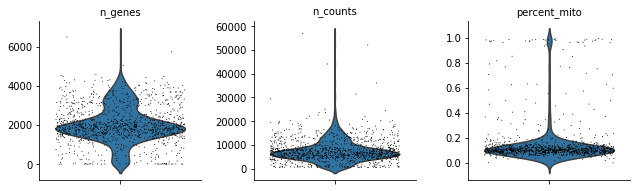

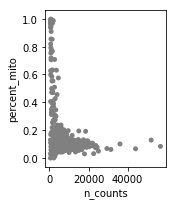

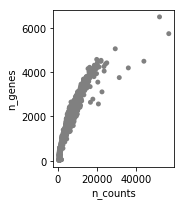

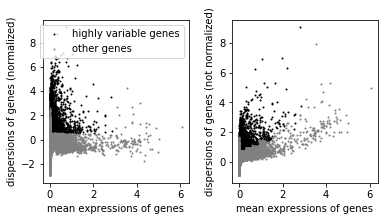

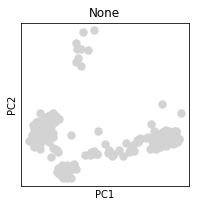

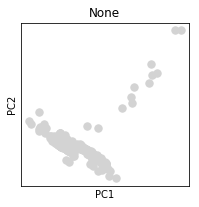

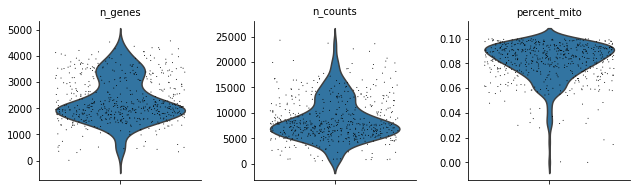

AnnData object with n_obs × n_vars = 549 × 2567 
    obs: 'percent_mito', 'n_counts', 'n_genes'
    var: 'n_cells', 'n_counts'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


In [11]:
sampleCleanedCountMatrix = readData("./Data/Datasets/filtered_feature_bc_matrix/")

In [12]:
def cluster(data):
    sc.pp.scale(data, max_value=10)
    sc.tl.pca(data)
    sc.pp.neighbors(data)
    sc.logging.print_memory_usage()
    sc.tl.umap(data)
    sc.logging.print_memory_usage()
    sc.tl.tsne(data)
    sc.logging.print_memory_usage()

In [13]:
cluster(sampleCleanedCountMatrix)

Memory usage: current 0.54 GB, difference +0.54 GB
Memory usage: current 0.55 GB, difference +0.01 GB
Memory usage: current 0.55 GB, difference +0.00 GB


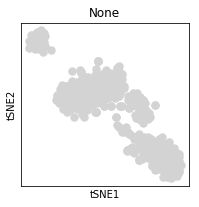

In [14]:
sc.pl.tsne(sampleCleanedCountMatrix)

In [16]:
def mergeAnnotations(scData, final_annotations):
    scData.obs["level1"] = final_annotations.level1
    scData.obs["level2"] = final_annotations.level2
    return scData

In [17]:
merged = mergeAnnotations(sampleCleanedCountMatrix, Sample_object.sc_annot)

... storing 'level1' as categorical
... storing 'level2' as categorical


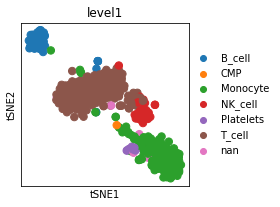

In [18]:
sc.pl.tsne(sampleCleanedCountMatrix, color = "level1")

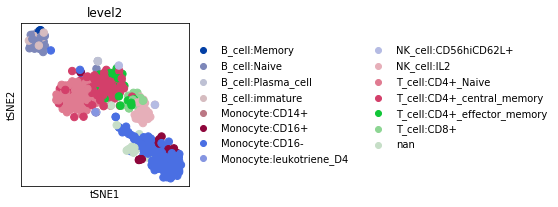

In [19]:
sc.pl.tsne(sampleCleanedCountMatrix, color = "level2")